General file where takes in some inputs (distance, resolution) at the start, and then outputs the EAGLE at some specified resolution and FOV.

Can use this template for telescopes other than Dragonfly or something (e.g. CASTOR).

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'make_mockobs.ipynb'

In [12]:
machine='chinook'

distance = '500Mpc'; resolution = None; slicewidth = 20
#distance = '50Mpc'; resolution = None; slicewidth = 20

data_tuple_20 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth,DragonflyTelescope=False)


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 500Mpc is 1.28107372426.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_500Mpc_1arcsec_20slwd.npz does not exist, making it now...
Data exists, loading ./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 1.0.
DEBUGGING: data_tuple is: 
(array([[-2.62077141, -2.62564492, -2.63008714, ..., -2.60400987,
        -2.60988569, -2.61549926],
       [-2.61682892, -2.62165141, -2.62603831, ..., -2.60022902,
        -2.60604405, -2.61160588],
       [-2.61321568, -2.6179862 , -2.62232232, ..., -2.59680223,
        -2.60254669, -2.60804701],
       ..., 
       [-2.63436723, -2.63937879, -2.64398909, ..., -2.61722207,
        -2.62324262, -2.62897563],
       [-2.62957692, -2.63454533, -2.63909

In [13]:
print data_tuple_20[0].shape
print data_tuple_20[3]

(32000, 32000)
1.28107372426


In [18]:
resolution = data_tuple_20[3] # arcsec
#data_FOV, xystarts, size = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,\
#                                      y_center=13.5,x_angFOV=3000.,y_angFOV=3000.)

## CWI
x_angFOV=60.;y_angFOV=40.
data_FOV_CWI, xystarts_CWI, size_CWI = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,\
                                                  y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)

## KCWI
x_angFOV=20.;y_angFOV=34.
data_FOV_KCWI, xystarts_KCWI, size_KCWI = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,\
                                                     y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)

## MUSE
x_angFOV=60.;y_angFOV=60.
data_FOV_MUSE, xystarts_MUSE, size_MUSE = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,\
                                                     y_center=13.6,x_angFOV=x_angFOV,y_angFOV=y_angFOV)


The type of size is <type 'list'>


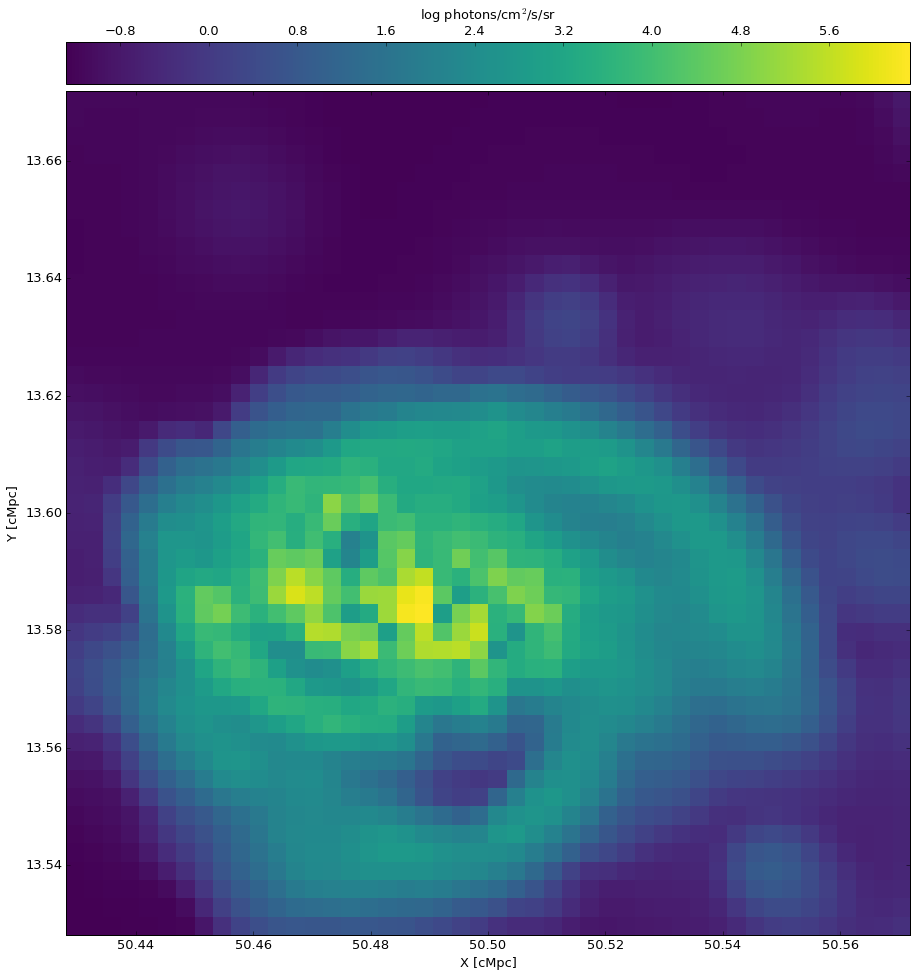

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV_MUSE, size_MUSE, ax1,xystarts = xystarts_MUSE)


In [13]:
data_FOV.shape

(4554, 4554)